In [3]:
import os
import numpy as np
import netCDF4
import datetime
import logging
import cmocean
import calendar
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import sdcclimatologies

In [55]:
datadir = "/data/SeaDataCloud/NorthSea/"
varname = "Salinity"
datafile3 = os.path.join(datadir, "NorthSea_obs_{}_sdn_wod_merged.nc".format(varname))
datafile2 = os.path.join(datadir, "NorthSea_obs_{}_wod.nc".format(varname))
datafile1 = os.path.join(datadir, "NorthSea_obs_{}.nc".format(varname))
os.path.exists(datafile3)

True

In [53]:
def read_salinity_nc(datafile):
    with netCDF4.Dataset(datafile, "r") as nc:
        lon = nc.variables["obslon"][:]
        lat = nc.variables["obslat"][:]
        time = nc.variables["obstime"][:]
        timeunits = nc.variables["obstime"].units
        depth = nc.variables["obsdepth"][:]
        S = nc.variables["Salinity"][:]
    dates = netCDF4.num2date(time, timeunits)
    
    return lon, lat, depth, dates, S

In [58]:
def get_surface_values(lon, lat, depth, dates, S, depthmin=5.0):
    gooddepth = (depth < 5.0) 
    print(np.count_nonzero(gooddepth))
    lon = lon[gooddepth]
    lat = lat[gooddepth]
    dates = dates[gooddepth]
    depth = depth[gooddepth]
    S = S[gooddepth]
    
    return lon, lat, depth, dates, S

In [56]:
lon1, lat1, depth1, dates1, S1 = read_salinity_nc(datafile1)
lon2, lat2, depth2, dates2, S2 = read_salinity_nc(datafile2)
lon3, lat3, depth3, dates3, S3 = read_salinity_nc(datafile3)

## Histogram with all data

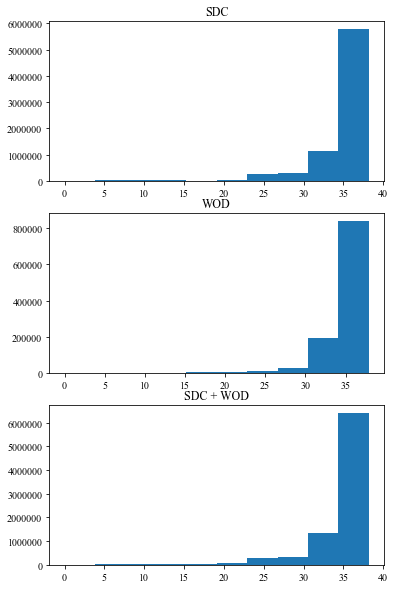

In [66]:
fig = plt.figure(figsize=(6, 10))
plt.subplot(311)
plt.hist(S1)
plt.title("SDC")
plt.subplot(312)
plt.hist(S2)
plt.title("WOD")
plt.subplot(313)
plt.hist(S3)
plt.title("SDC + WOD")
plt.show()
plt.close()

## Histogram with near surface data

In [64]:
lon1s, lat1s, depth1s, dates1s, S1s = \
get_surface_values(lon1, lat1, depth1, dates1, S1, depthmin=5.0)
lon2s, lat2s, depth2s, dates2s, S2s = \
get_surface_values(lon2, lat2, depth2, dates2, S2, depthmin=5.0)
lon3s, lat3s, depth3s, dates3s, S3s = \
get_surface_values(lon3, lat3, depth3, dates3, S3, depthmin=5.0)

741848
165384
874868


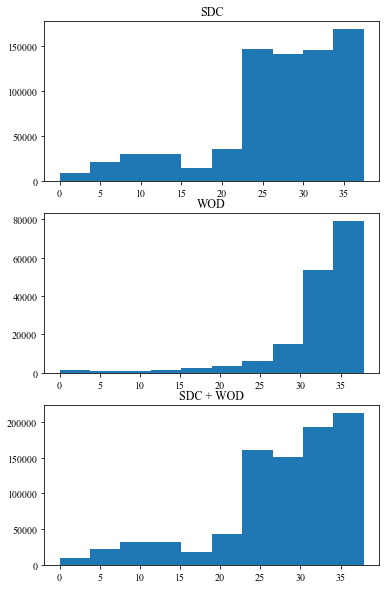

In [67]:
fig = plt.figure(figsize=(6, 10))
plt.subplot(311)
plt.hist(S1s)
plt.title("SDC")
plt.subplot(312)
plt.hist(S2s)
plt.title("WOD")
plt.subplot(313)
plt.hist(S3s)
plt.title("SDC + WOD")
plt.show()
plt.close()

## Salinity with respect to time

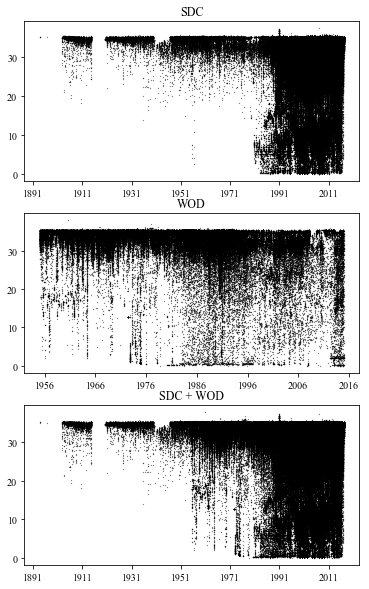

In [68]:
fig = plt.figure(figsize=(6, 10))
plt.subplot(311)
plt.plot(dates1s, S1s, "ko", markersize=0.2)
plt.title("SDC")

plt.subplot(312)
plt.plot(dates2s, S2s, "ko", markersize=0.2)
plt.title("WOD")

plt.subplot(313)
plt.plot(dates3s, S3s, "ko", markersize=0.2)
plt.title("SDC + WOD")
plt.show()
plt.close()

## Mean salinity per year

In [72]:
Smean = np.zeros(len(range(1950, 2015)))
for iyear, yy in enumerate(range(1950, 2015)):
    goodyears = [dd.year == yy for dd in dates1]
    print(np.count_nonzero(goodyears))
    Smean[iyear] = np.mean(S1[goodyears])

5394
8135
8146
6583
5949
6931
4178
5074
5922
5772
6767
5591
4312
4154
2940
5298
5400
1605
3528
1841
5322
2182
5231
2916
3269
5763
4574
2316
2396
11887
2390
2901
3275
6453
8447
8652
8435
36912
96803
127419
150816
43787
156096
100240
83975
212431
259999
225589
331570
388602
303389
317284
364795
282115
429632
405855
295796
432826
304640
326626
281710
245626
222449
274371
231584


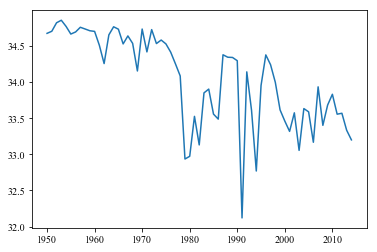

In [73]:
plt.plot(range(1950, 2015), Smean)
plt.show()
plt.close()

In [77]:
Smean2 = np.zeros(len(range(1950, 2015)))
goodyearlist = []
for iyear, yy in enumerate(range(1950, 2015)):
    goodyears = [dd.year == yy for dd in dates1s]
    goodyearlist.append(goodyears)
    Smean2[iyear] = np.mean(S1s[goodyears])

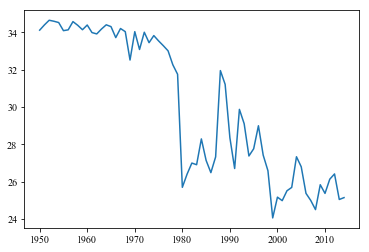

In [78]:
plt.plot(range(1950, 2015), Smean2)
plt.show()
plt.close()

## Scatter plot of salinity near surface, year by year

In [79]:
sdcdir = "../Julia/Climatologies/NorthSea/output/"
sdc_monthly_T = os.path.join(sdcdir, "Water_body_Temperature_NorthSea.4Danl_monthly_merged_coeffderiv.nc")
sdc_monthly_S = os.path.join(sdcdir, "Water_body_Salinity_NorthSea.4Danl_monthly_merged_coeffderiv.nc")

lonmin, lonmax, latmin, latmax, dmin, dmax, datemin, datemax = \
sdcclimatologies.get_SDN_domain(sdc_monthly_S)
m = Basemap(projection='merc',llcrnrlat=latmin, urcrnrlat=latmax,
            llcrnrlon=lonmin, urcrnrlon=lonmax, lat_ts=0.5*(latmin+latmax), resolution='i')

In [83]:
for iyear, yy in enumerate(range(1950, 2015)):
    goodyears = [dd.year == yy for dd in dates1s]
    m.scatter(lon1s[goodyears], lat1s[goodyears], c=S1s[goodyears], s=2, latlon=True,
             vmin=25., vmax=35)
    m.drawcoastlines(linewidth=0.2)
    plt.title(yy)
    plt.colorbar()
    plt.savefig("Salinity_scatter_{}".format(yy), dpi=300, bbox_inches="tight")
    plt.close()